# **IMPORTING IMPORTANT LIBRARIES**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import  seaborn as sns 


import warnings
warnings.filterwarnings('ignore')

# **READING THE DATASET**

In [3]:
data = pd.read_csv(r"E:\AI & Data_Science\DEPI\hypertension(26k,14).csv")
df=pd.DataFrame(data)
data=pd.concat([data,df.loc[10:110]],ignore_index=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **EDA** 

In [5]:
print(data.info())

print("Missing values:\n", data.isnull().sum())

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26184 entries, 0 to 26183
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26184 non-null  float64
 1   sex       26159 non-null  float64
 2   cp        26184 non-null  int64  
 3   trestbps  26184 non-null  int64  
 4   chol      26184 non-null  int64  
 5   fbs       26184 non-null  int64  
 6   restecg   26184 non-null  int64  
 7   thalach   26184 non-null  int64  
 8   exang     26184 non-null  int64  
 9   oldpeak   26184 non-null  float64
 10  slope     26184 non-null  int64  
 11  ca        26184 non-null  int64  
 12  thal      26184 non-null  int64  
 13  target    26184 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB
None
Missing values:
 age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26184.000000,26159.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000,26184.000000
mean,55.666743,0.499293,0.960434,131.583906,246.253628,0.149863,0.526428,149.691185,0.325962,1.037932,1.401046,0.720478,2.318057,0.548999
std,15.175703,0.500009,1.024189,17.584848,51.664423,0.356943,0.525546,22.850700,0.468742,1.164185,0.616568,1.011094,0.604292,0.497603
min,11.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 101


In [9]:
data.drop_duplicates(inplace=True)

In [11]:
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

In [13]:
numerical_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

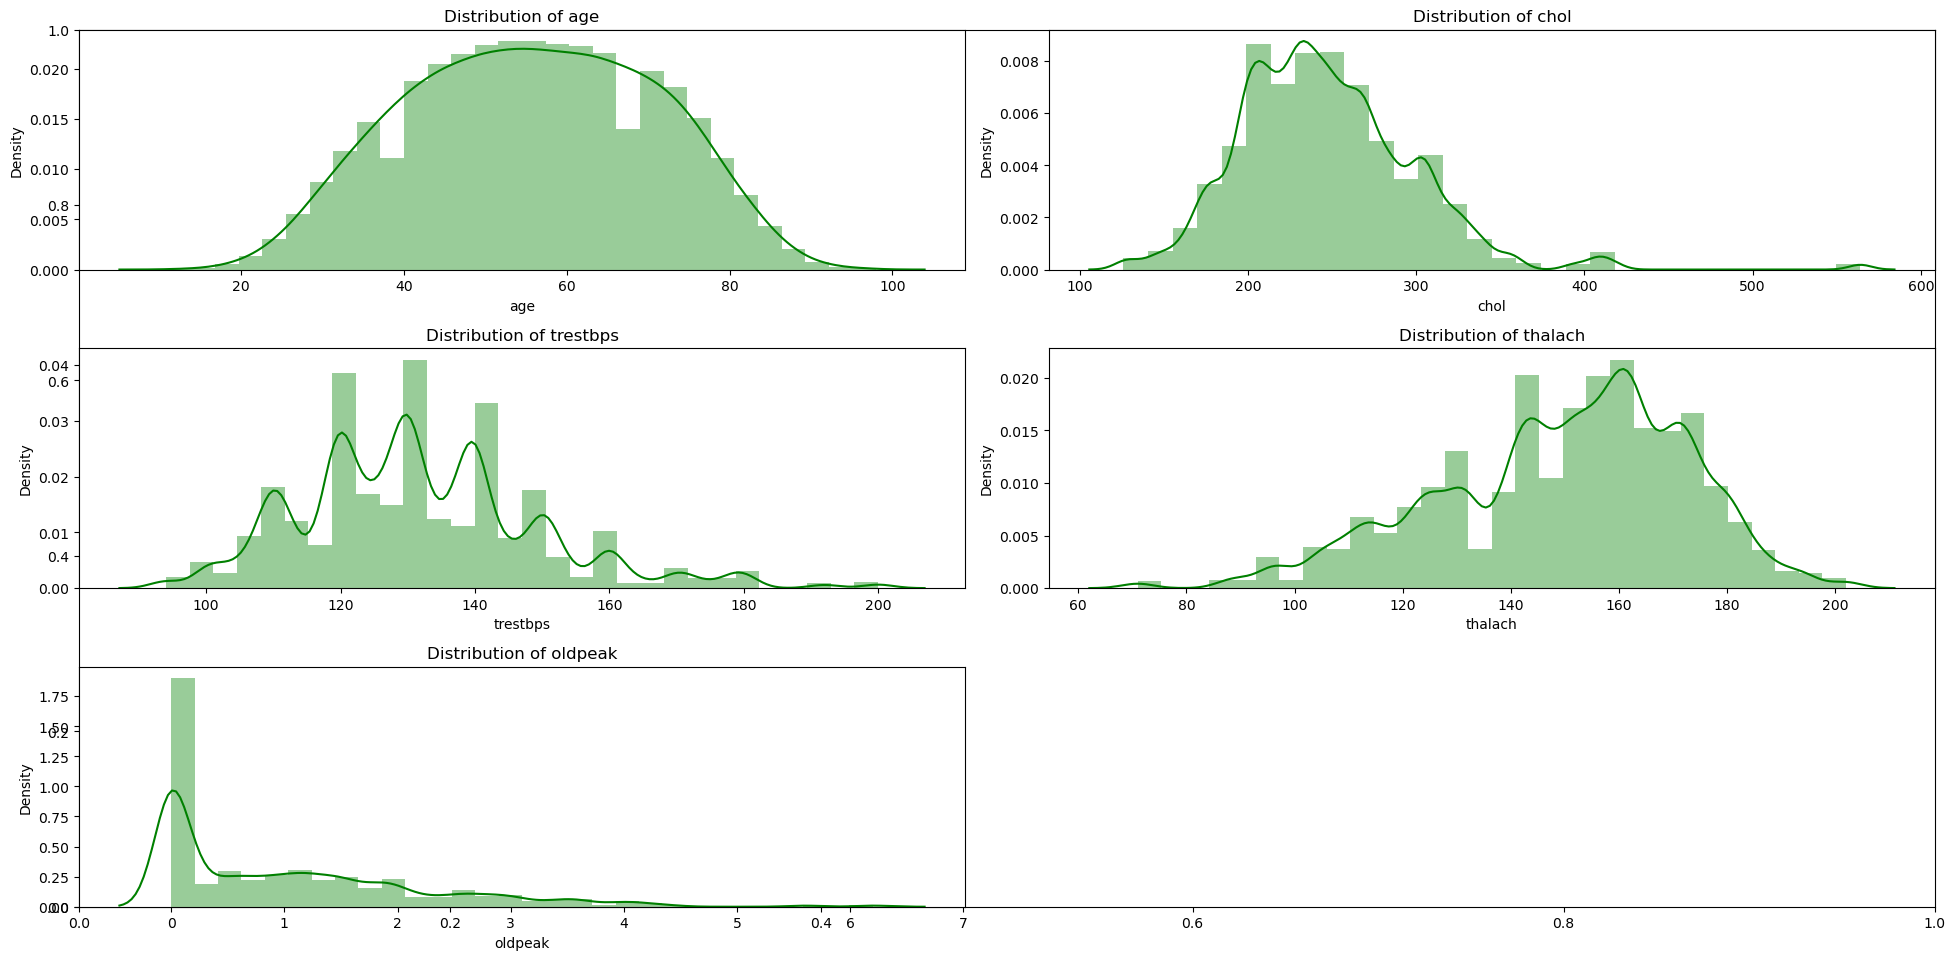

In [15]:
plt.subplots(figsize=(20,10))
for i ,column in enumerate(numerical_features):
    plt.subplot(3,2, i+1)
    sns.distplot(data[column], bins=30, color='g')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

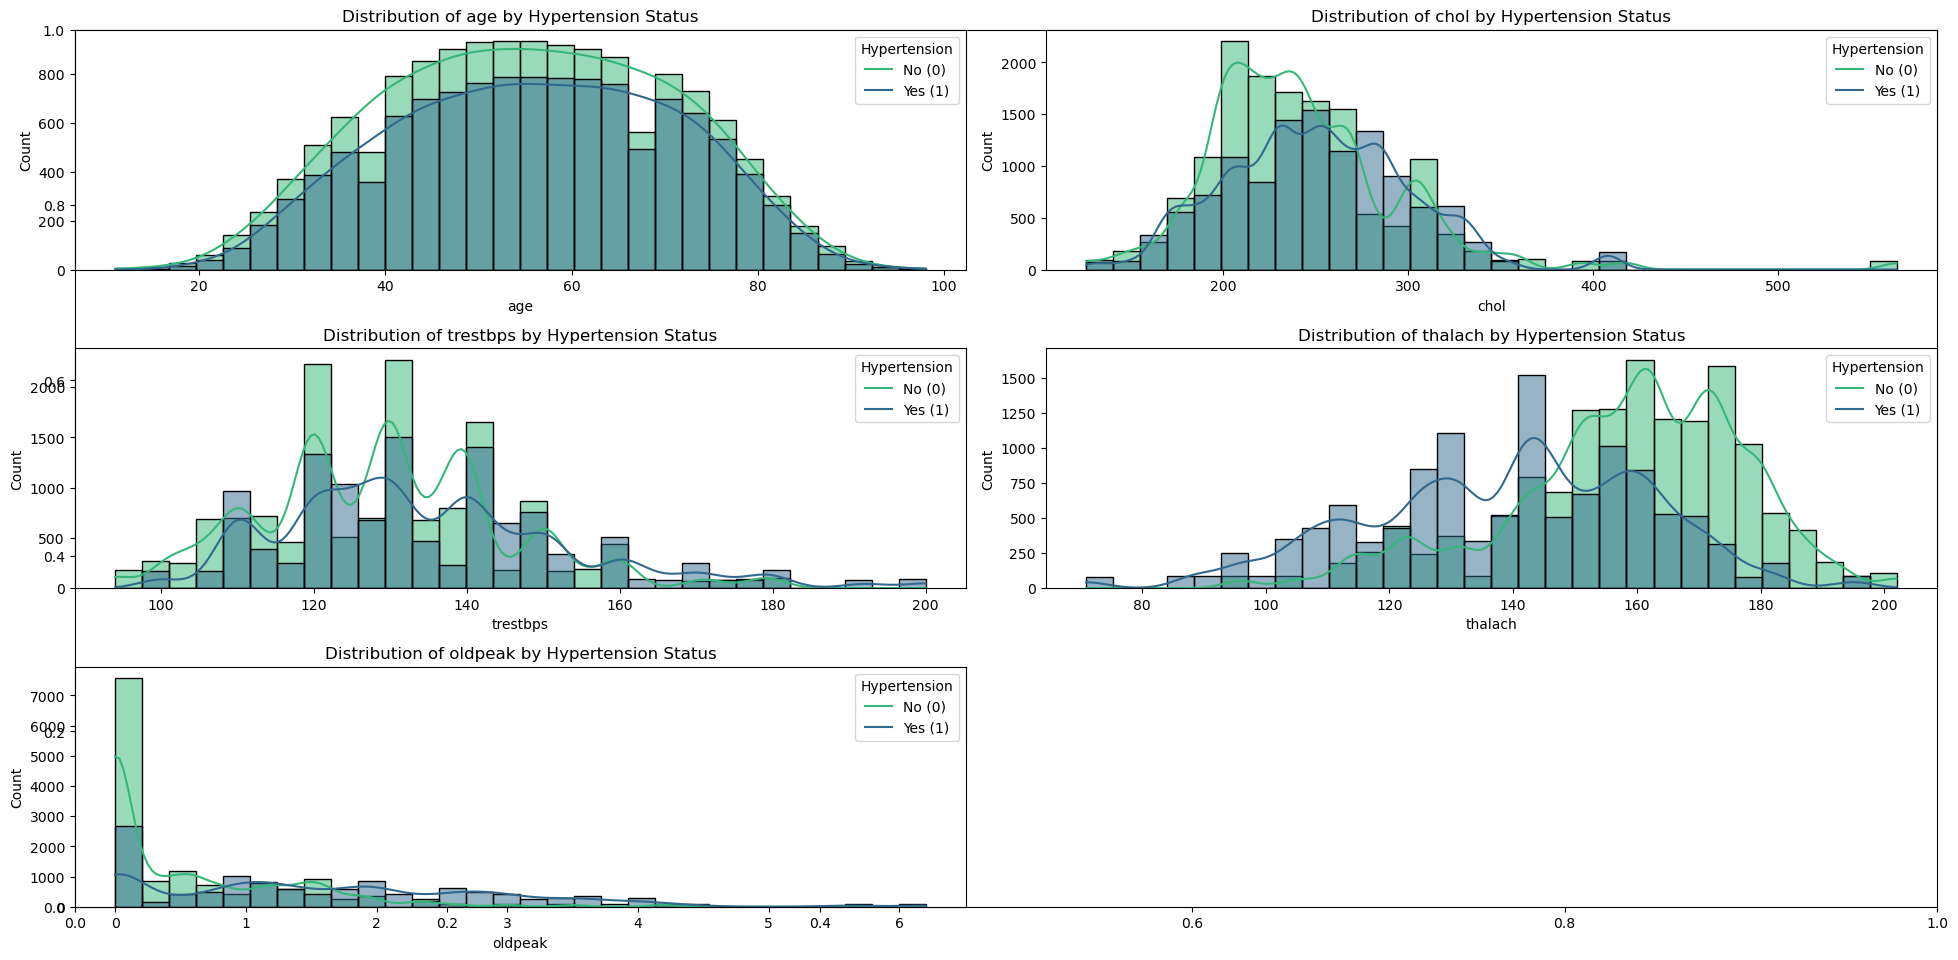

In [16]:
plt.subplots(figsize=(20,10))
for i ,column in enumerate(numerical_features):
    plt.subplot(3,2, i+1)
    sns.histplot(data=data, x=column, hue='target', kde=True, palette='viridis', bins=30)
    plt.title(f"Distribution of {column} by Hypertension Status")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Hypertension", labels=["No (0)", "Yes (1)"])  
plt.tight_layout()
plt.show()

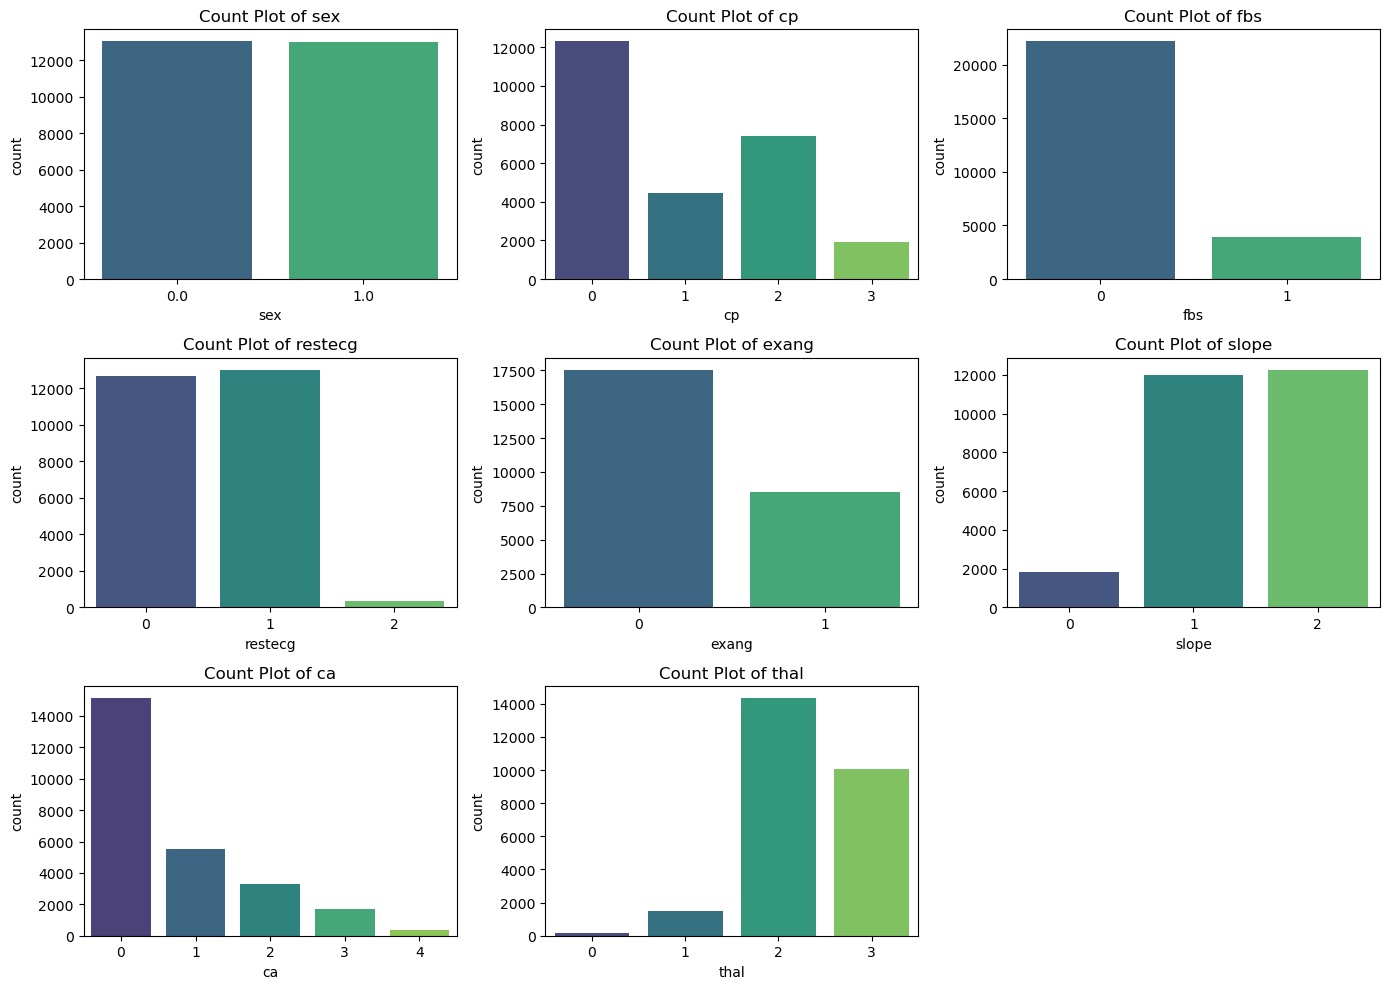

In [17]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, palette="viridis")
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

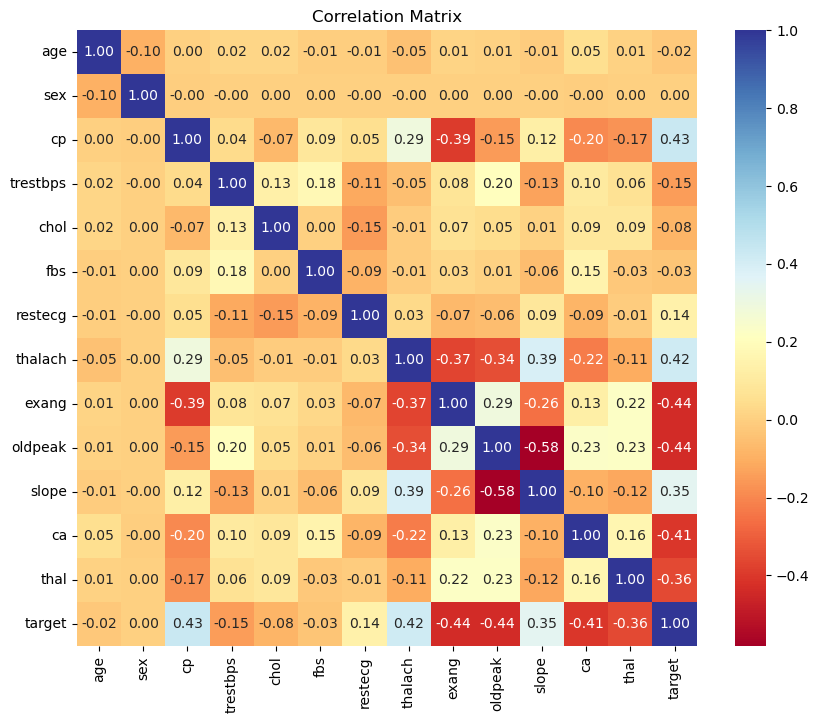

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()

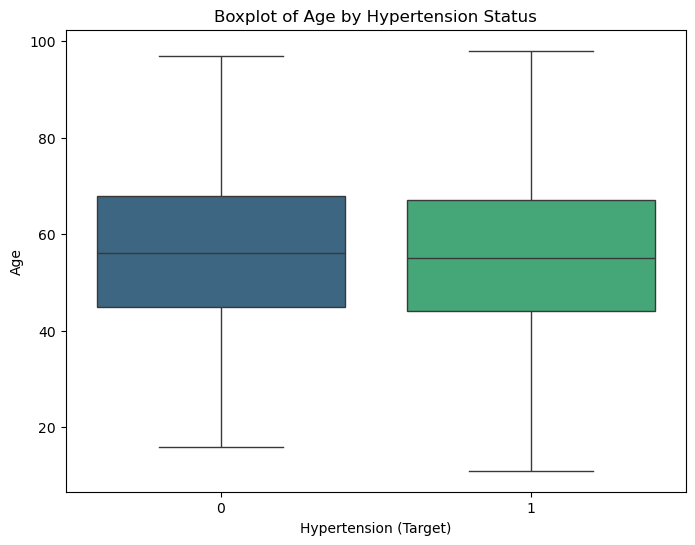

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='target', y='age', palette="viridis")
plt.title("Boxplot of Age by Hypertension Status")
plt.xlabel("Hypertension (Target)")
plt.ylabel("Age")
plt.show()

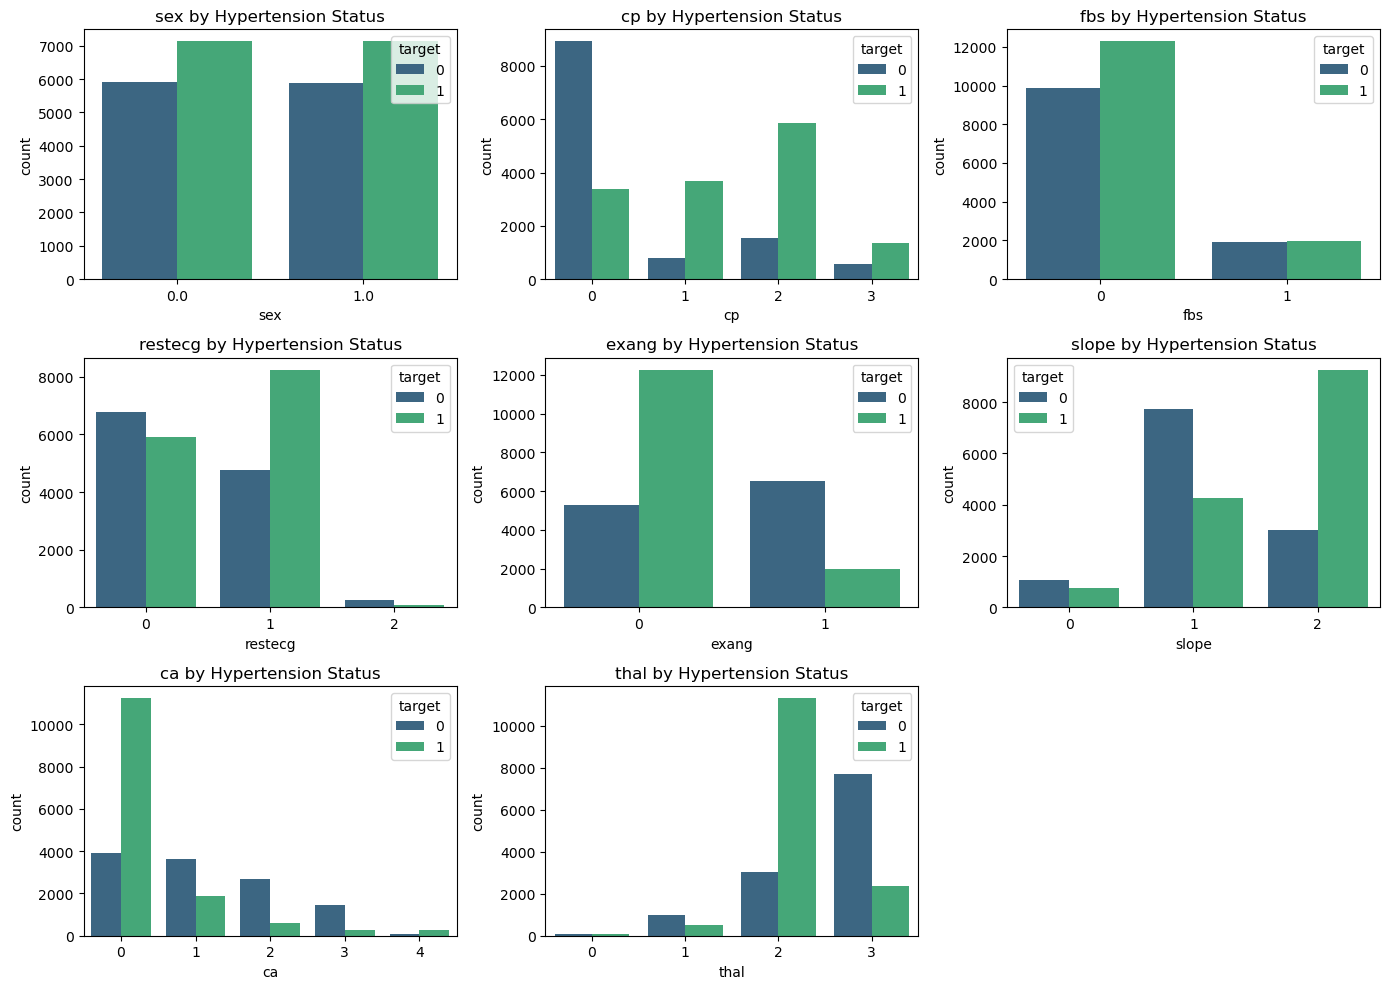

In [20]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, hue='target', palette="viridis")
    plt.title(f"{col} by Hypertension Status")
plt.tight_layout()
plt.show()

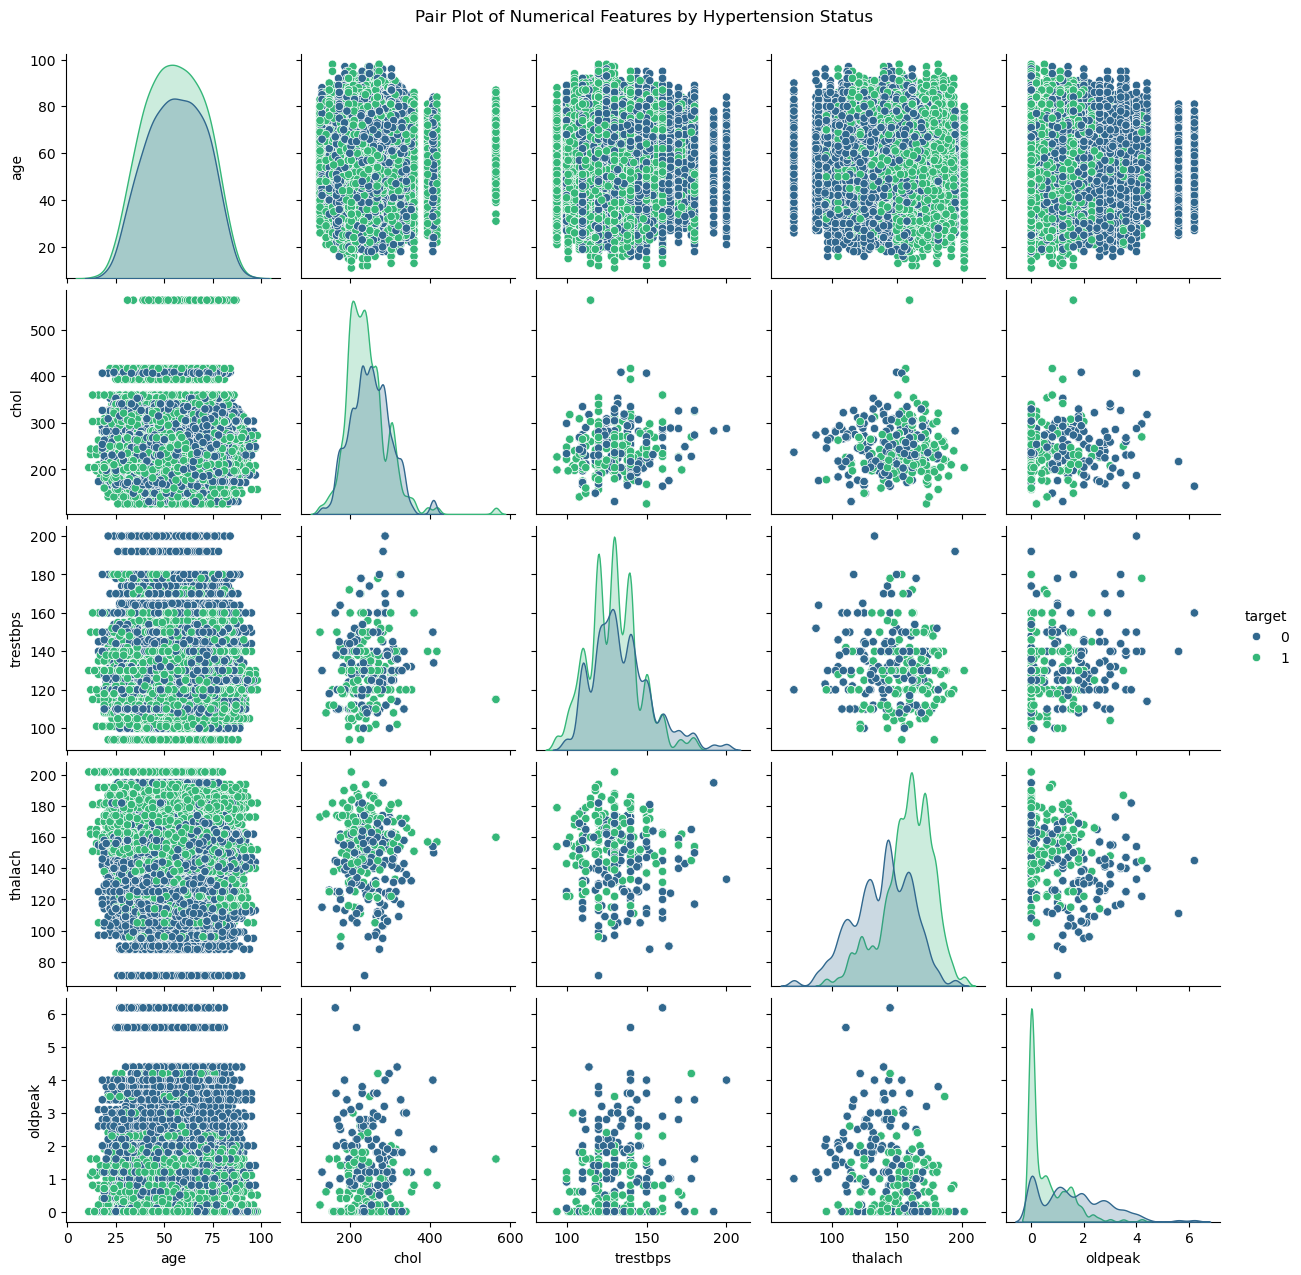

In [21]:
sns.pairplot(data, vars=['age', 'chol', 'trestbps', 'thalach', 'oldpeak'], hue='target', palette="viridis")
plt.suptitle("Pair Plot of Numerical Features by Hypertension Status", y=1.02)
plt.show()

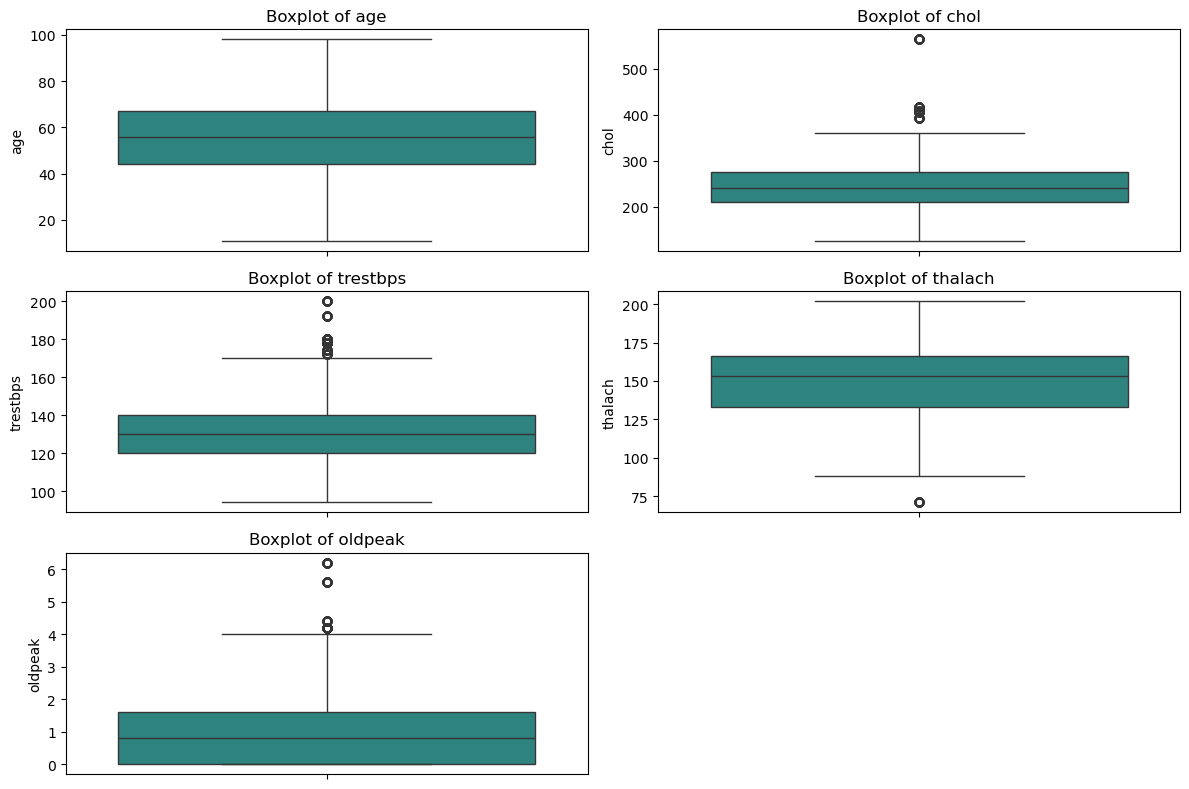

In [22]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, y=col, palette="viridis")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()